In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch 

In [2]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
data.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [5]:
data.shape


(10000, 10)

In [6]:
data.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [7]:
def strip_clg(x):
    return int(x[3:])

In [8]:
data[data.columns[0]]= data[data.columns[0]].apply(strip_clg)

In [9]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,No,8,8,4,No
1,61,97,5.52,5.37,8,No,7,8,0,No
2,36,109,5.36,5.83,9,No,3,1,1,No
3,55,122,5.47,5.75,6,Yes,1,6,1,No
4,4,96,7.91,7.69,7,No,8,10,2,No


In [10]:
no_yes_dict = {"No":0,"Yes":1}
# no_yes_dict_internship_exp = dict(zip(data[data.columns[5]].unique(),range(data[data.columns[5]],unique().shape[0])))
# no_yes_dict_placement = dict(zip(data[data.columns[-1]].unique(),range(data[data.columns[-1]],unique().shape[0])))

In [11]:
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)

In [12]:
data[data.columns[9]] = data[data.columns[9]].map(no_yes_dict)

In [13]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [14]:
corr_data = data.corr()

In [15]:
corr_data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


In [16]:
feature_selected_data = data[[data.columns[1],data.columns[2],data.columns[3],data.columns[7],data.columns[8],data.columns[9]]]

In [17]:
feature_selected_data

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0
...,...,...,...,...,...,...
9995,119,8.41,8.29,8,0,1
9996,70,9.25,9.34,7,2,0
9997,89,6.08,6.25,9,5,0
9998,107,8.77,8.92,5,1,0


In [18]:
placement_equals_1 = data[data[data.columns[-1]] == 1].shape[0]/data.shape[0]

In [19]:
placement_equals_1

0.1659

<Axes: >

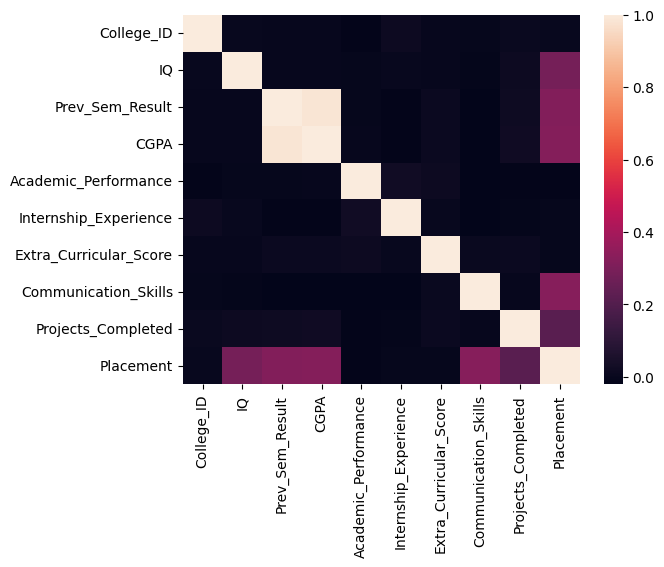

In [20]:
sns.heatmap(corr_data)

<Axes: >

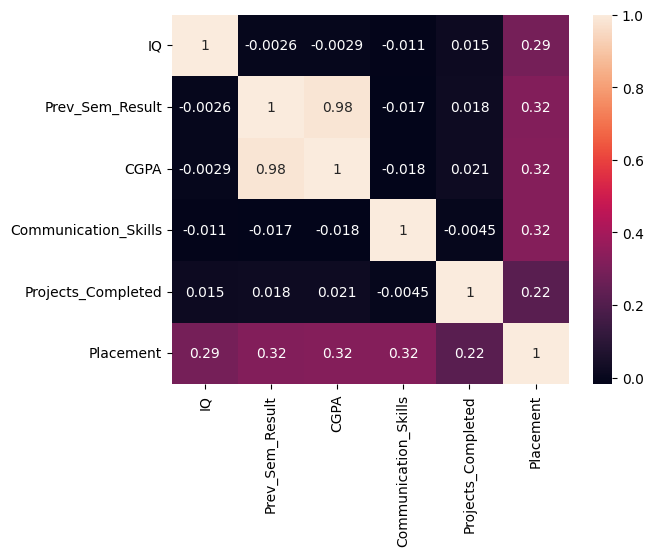

In [21]:
sns.heatmap(feature_selected_data.corr(),annot=True)

In [22]:
x = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(x,rowvar=False)
F = np.linalg.svd(cov_mat)
E = F[0]
lamda = F[1]

In [23]:
print(F[1])

[2.26597565e+02 8.41678439e+00 4.21673530e+00 2.94002762e+00
 4.09142123e-02]


In [24]:
print(E)

[[-9.99996139e-01 -2.17743344e-03 -3.46642553e-04 -1.69114141e-03
   1.81562132e-05]
 [ 2.57815004e-04  1.75779405e-02 -7.00202535e-01 -3.92089239e-02
  -7.12649998e-01]
 [ 2.83169595e-04  1.83550525e-02 -7.11415827e-01 -3.77209711e-02
   7.01518112e-01]
 [ 2.18074163e-03 -9.99665581e-01 -2.56049574e-02  2.87028185e-03
   3.43247779e-04]
 [-1.67910057e-03  4.25354616e-03 -5.42973035e-02  9.98513240e-01
  -1.48345515e-03]]


In [25]:
e1 = E[:,0]
e2 = E[:,1]
e3 = E[:,2]
e4 = E[:,3]
e5 = E[:,4]
print("The dot product between e1 and e2 is ",np.dot(e1,e2))
print("The magnitude of e1 is ",np.linalg.norm(e1))
print("The magnitude of e2 is ",np.linalg.norm(e2))
print("The magnitude of e3 is ",np.linalg.norm(e3))
print("The magnitude of e4 is ",np.linalg.norm(e4))
print("The magnitude of e5 is ",np.linalg.norm(e5))

The dot product between e1 and e2 is  4.2595875507287843e-19
The magnitude of e1 is  1.0000000000000002
The magnitude of e2 is  0.9999999999999997
The magnitude of e3 is  0.9999999999999998
The magnitude of e4 is  1.0
The magnitude of e5 is  0.9999999999999999


In [26]:
new_X = np.matmul(x,E)
new_X_cov_mat = np.cov(new_X,rowvar=False)
print(new_X_cov_mat)

[[ 2.26597565e+02 -6.45436300e-14  3.26882347e-16 -1.79572107e-15
   3.26882347e-17]
 [-6.45436300e-14  8.41678439e+00 -1.94175220e-15 -4.49907360e-16
  -5.77262677e-16]
 [ 3.26882347e-16 -1.94175220e-15  4.21673530e+00 -1.32253000e-15
   8.46857338e-16]
 [-1.79572107e-15 -4.49907360e-16 -1.32253000e-15  2.94002762e+00
  -7.57392171e-16]
 [ 3.26882347e-17 -5.77262677e-16  8.46857338e-16 -7.57392171e-16
   4.09142123e-02]]


In [27]:
new_feature_data = pd.DataFrame(data = new_X ,
                            columns = ["Input_feature_1","Input_feature_2","Input_feature_3","Input_feature_4","Input_feature_5"])

In [28]:
new_feature_data

,Input_feature_1,Input_feature_2,Input_feature_3,Input_feature_4,Input_feature_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

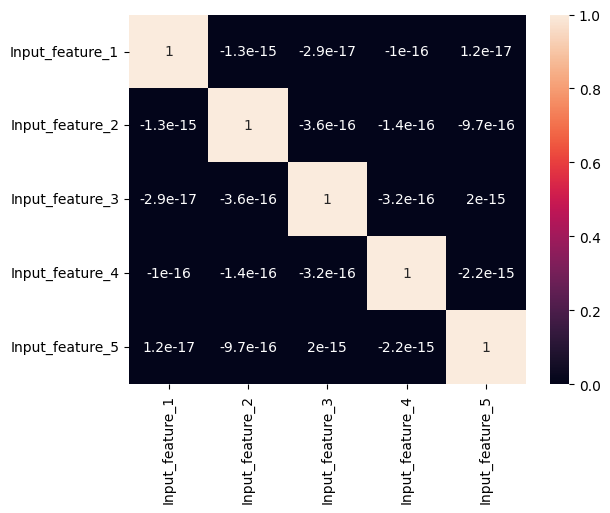

In [29]:
sns.heatmap(new_feature_data.corr(),annot=True)

In [30]:
new_data = pd.concat([new_feature_data,feature_selected_data[data.columns[-1]]],axis=1)

In [31]:
new_data

,Input_feature_1,Input_feature_2,Input_feature_3,Input_feature_4,Input_feature_5,Placement
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328,0
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169,0
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885,0
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325,0
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179,0
...,...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895,1
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127,0
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864,0
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777,0


<Axes: >

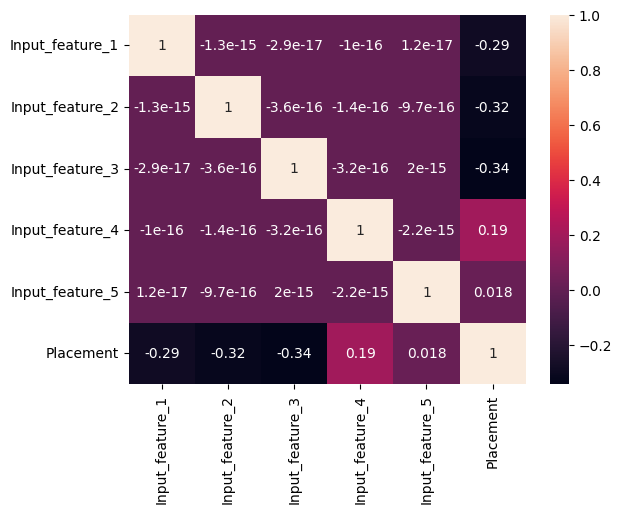

In [32]:
sns.heatmap(new_data.corr(),annot=True)

(array([  3.,  22., 101., 362., 572., 236., 208., 109.,  38.,   8.]),
 array([-157.98374855, -147.7834374 , -137.58312626, -127.38281511,
        -117.18250397, -106.98219282,  -96.78188168,  -86.58157053,
         -76.38125939,  -66.18094824,  -55.98063709]),
 <BarContainer object of 10 artists>)

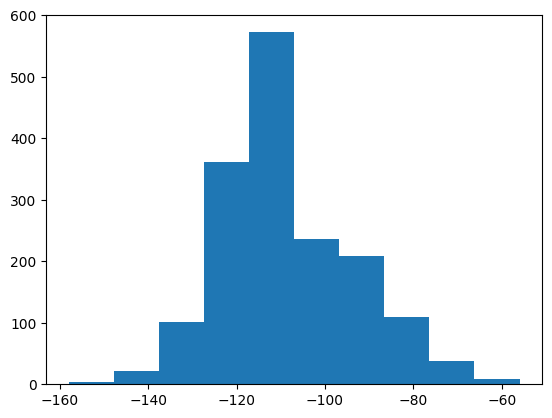

In [33]:
plt.hist(new_data[new_data[new_data.columns[-1]]==1][new_data.columns[0]])

In [34]:
new_data[new_data[new_data.columns[-1]]==1][new_data.columns[0]]

6      -122.981852
7      -110.996007
18      -85.982336
20     -120.993575
23      -77.976418
           ...    
9964   -122.993803
9978    -83.981477
9992   -108.977394
9994   -116.992906
9995   -118.977579
Name: Input_feature_1, Length: 1659, dtype: float64

In [35]:
data =np.array(new_data[new_data[new_data.columns[-1]]==1][new_data.columns[0]])

mu_vals=np.linspace(-120, -100, 100)
sigma_vals=np.linspace(20,35,100)

mu,sigma=np.meshgrid(mu_vals,sigma_vals)
